# Regresión Lineal

### Laboratorio de Datos, IC - FCEN - UBA - 1er. Cuatrimestre 2024



### Preparando scikit-learn

Utilizaremos el módulo `scikit-learn` de Python. Para instalarlo, correr:

In [2]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Importamos los módulos de siempre, las herramientas de modelos lineales y las medidas de desempeño del modelo de `scikit-learn`:

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from gapminder import gapminder

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

### Modelo de Regresión Lineal

Queremos utilizar un modelo lineal:
$$ Y = \beta_0 + \beta_1 X $$
para intentar predecir valores continuos.

### Visualización

Con lo que hemos visto las clases anteriores, visualizar la recta que mejor aproxima a los datos en el sentido de cuadrados mínimos es relativamente sencillo con `seaborn objects`, ya que `seaborn` calcula automáticamente los valores de $\beta_0$ y $\beta_1$.

Utilizaremos el dataset _tips_ de `seaborn` y analizaremos la relación entre lo que costó la comida y la cantidad de propina.

In [2]:
datos = sns.load_dataset('tips')

Visualizamos los datos con `so.Plot` (repasar clase de visualización)

# Graficamos la relacion entre las variables 

(
    so.Plot(data=datos, x='total_bill', y='tip')
    .add(so.Dot())
)

Para visualizar la recta de la regresión, agregamos una línea al gráfico (`so.Line()`) junto a `so.PolyFit(1)`:

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


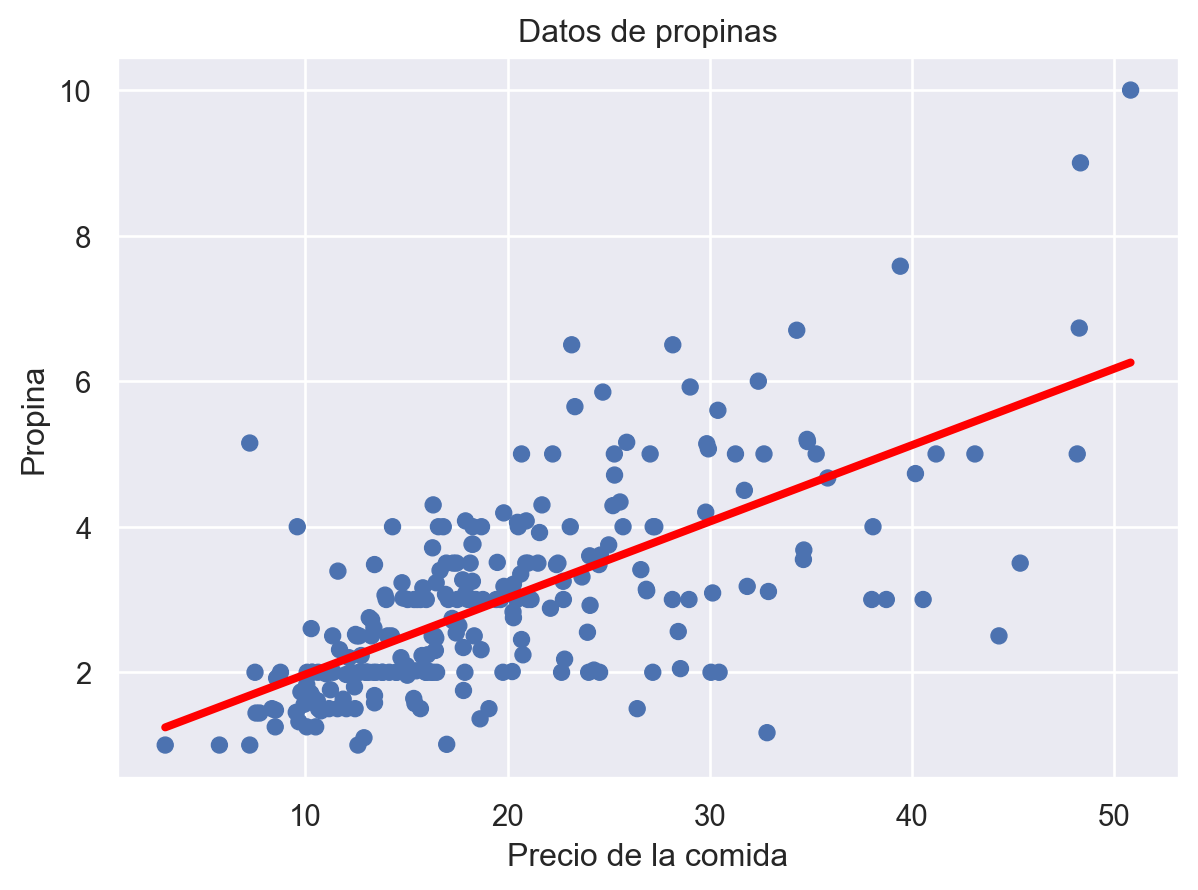

In [3]:
(
    so.Plot(data=datos, x='total_bill', y='tip')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1))    # , label='Regresion lineal' Agregamos una etiqueta para la leyenda del grafico
    .label(title='Datos de propinas', x='Precio de la comida', y='Propina')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

### Cálculo de coeficientes y predicciones

Desafortunamente, `seaborn` no nos devuelve los valores de $\beta_0$ y $\beta_1$, que son importantes en la interpretación del resultado.

Hemos visto que podemos calcular los coeficientes de la regresión lineal como:

 $$
 \begin{array}{rl}
      \hat{\beta}_1 = & \dfrac{\displaystyle\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\displaystyle\sum_{i=1}^n(x_i - \bar{x})^2}  \\[1em]
      \hat{\beta}_0 = & \bar{y} - \hat{\beta}_1\bar{x}
 \end{array}
 $$

 pero también podemos utilizar `scikit-learn`:

In [27]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo.fit(datos[['total_bill']], datos[['tip']])   # Realizamos el ajuste
beta_1 = modelo.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
beta_0 = modelo.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)

# Para obtener los valores de beta_1 y beta_0 como valores numericos
beta_1 = modelo.coef_[0][0]
beta_0 = modelo.intercept_[0]
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)

# O podemos usar .item()
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)


Beta_1:  0.10502451738435337
Beta_0:  0.9202696135546731
Beta_1:  0.10502451738435337
Beta_0:  0.9202696135546731


**MUY IMPORTANTE:** notar los corchetes extra de `datos[['metros_cuad']]` y `datos[['precio']]`. Los doble corchetes hacen que `datos[['precio']]` sea un pandas.Dataframe y no un pandas.Series.

<span style="color:red">**EL MÉTODO .fit() ADMITE DATAFRAMES (O MATRICES), NO ADMITE SERIES (NI ARRAYS). USAR DOBLE CORCHETE.**</span>

In [28]:
display(datos['total_bill'])
type(datos['total_bill'])

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

pandas.core.series.Series

In [29]:
display(datos[['total_bill']])
type(datos[['total_bill']])

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


pandas.core.frame.DataFrame

Entonces, la recta que mejor aproxima a los datos es (redondeando):
$$ Y = 0.92 + 0.105 X$$

Una interpretación que podemos darle a este resultado es que, por cada peso que costó la comida, se dejan de propina 0.105 pesos (o sea, alrededor de 10 centavos)

Con los valores de $\beta_0$ y $\beta_1$ podemos predecir cuanto será la propina según el valor de la comida. Supongamos que queremos predecir la propina que se deja por una cuenta \\$35. Utilizamos el método `predict()` del modelo.

<span style="color:red">**EL MÉTODO .predict() TAMBIEN SOLO ADMITE ADMITE DATAFRAMES (O MATRICES).**</span>

upongamos que queremos poner a la venta un inmueble de 105 m2. Sólo con esa
información y teniendo en cuenta los items anteriores, ¿cuál sería el precio de refencia
para la venta? Si sabemos además que el inmueble está en la Zona 2, ¿cambiaría en algo
el valor calculado anteriormente?

In [32]:
# Para devolver directamente el numero agregamos .item()
modelo.predict(pd.DataFrame({'total_bill': [35]})).item()

4.596127722007041

También podemos hacer directamente la cuenta porque ya sabemos cuanto valen $\beta_1$ y $\beta_0$:

In [33]:
beta_1 * 35 + beta_0

4.596127722007041

Según nuestro modelo, se deberían dejar aproximadamente \\$4.60 de propina. También podemos predecir la propina de una cuenta mayor a cualquiera que las que aparecen en los datos. Por ejemplo, una comida que costó \\$60:

In [34]:
modelo.predict(pd.DataFrame({'total_bill': [60]}))

array([[7.22174066]])

Podemos predecir varios valores de una:

In [35]:
modelo.predict(pd.DataFrame({'total_bill': [35, 60]}))

array([[4.59612772],
       [7.22174066]])

Para que nos devuelva un array de numpy en vez de una matriz, usamos el método `flatten()`:

In [36]:
modelo.predict(pd.DataFrame({'total_bill': [35, 60]})).flatten()

array([4.59612772, 7.22174066])

Esto sirve, por ejemplo, si queremos calcular los valores predichos por el modelo $\hat{y}_i$ :

In [37]:
y_pred = modelo.predict(datos[['total_bill']]).flatten()
display(y_pred)

array([2.70463616, 2.00622312, 3.12683472, 3.40725019, 3.5028225 ,
       3.57633966, 1.84133463, 3.74332864, 2.49983836, 2.47253198,
       1.99887141, 4.6234341 , 2.53974767, 2.85587147, 2.47778321,
       3.1866987 , 2.00517288, 2.631119  , 2.70253567, 3.0890259 ,
       2.80230897, 3.05121707, 2.57650625, 5.06033609, 3.00185555,
       2.79075627, 2.32444741, 2.25303074, 3.19930164, 2.98400138,
       1.92325375, 2.84746951, 2.50193885, 3.09322688, 2.78760553,
       3.4471595 , 2.63321949, 2.69833469, 2.88317784, 4.20438627,
       2.60486287, 2.75399769, 2.38431139, 1.93690694, 4.11301494,
       2.84116804, 3.25496464, 4.32306398, 3.91871958, 2.81491191,
       2.23727706, 2.0009719 , 4.57617306, 1.96421332, 3.60469628,
       2.96719746, 4.91225152, 3.69396712, 2.10074519, 5.98980307,
       3.05121707, 2.3706582 , 2.0776398 , 2.84116804, 2.76765087,
       3.02916192, 2.64792292, 1.24269488, 3.0449156 , 2.49668762,
       2.18266431, 2.71303813, 3.74122815, 3.57528941, 2.46728

O podemos calcular $\hat{y}$ usando los valores de $\beta_1$ y $\beta_0$

In [38]:
y_pred = beta_1 * datos['total_bill'] + beta_0
display(y_pred)

0      2.704636
1      2.006223
2      3.126835
3      3.407250
4      3.502822
         ...   
239    3.969131
240    3.774836
241    3.301175
242    2.791807
243    2.892630
Name: total_bill, Length: 244, dtype: float64

Finalmente, el bueno de `scikit-learn` nos calcula el coeficiente de determinación $R^ 2$: primero van los datos observados ( $y$ ) y luego los datos predichos ( $\hat{y}$ )

In [39]:
y_pred = modelo.predict(datos[['total_bill']])
r2_score(datos[['tip']], y_pred)

0.45661658635167657

De manera análoga podemos calcular el error cuadrático medio (ECM):

In [40]:
mean_squared_error(datos[['tip']], y_pred)

1.036019442011377

### EJERCICIOS PRÁCTICA

Ejercicio 2

In [5]:
datos = pd.read_csv('inmuebles.csv')
datos.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


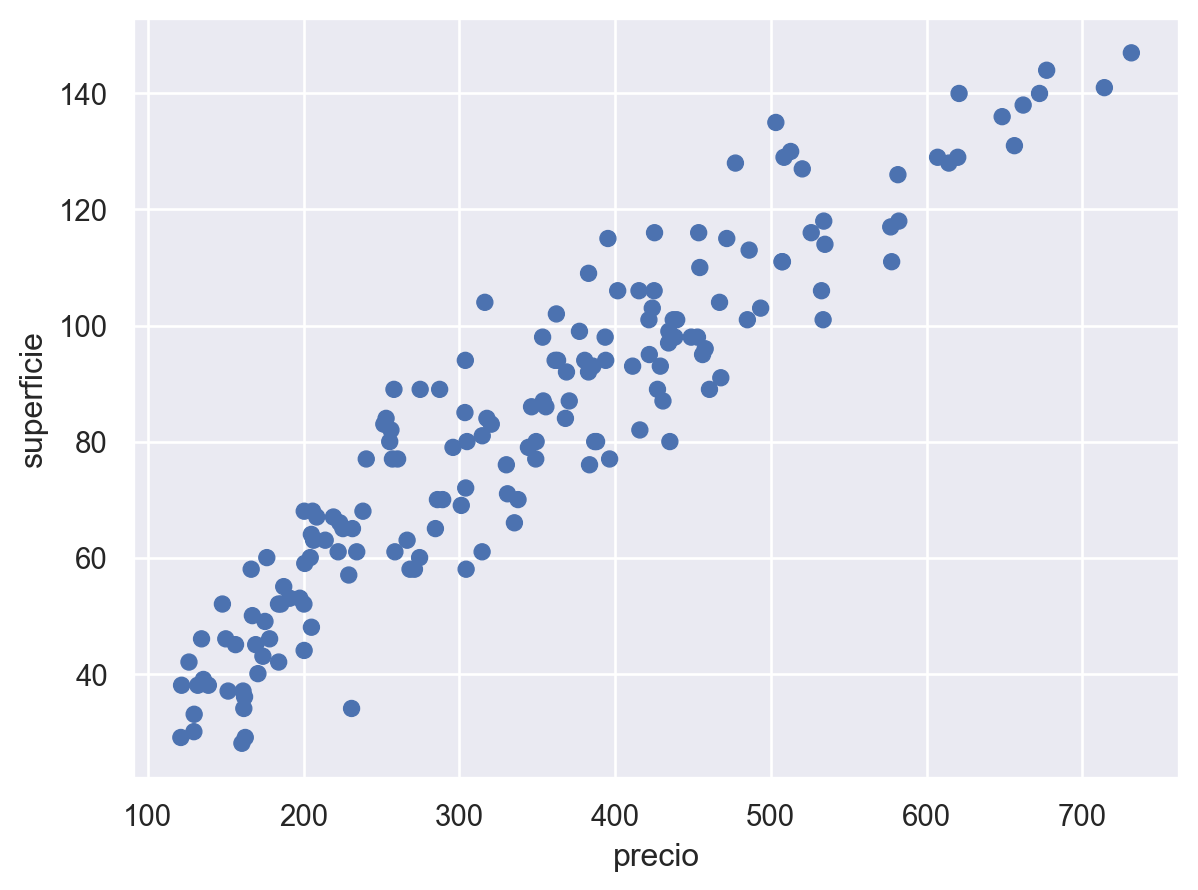

In [6]:
(
    so.Plot(data = datos, x= "precio", y= "superficie")
    .add(so.Dot())
)

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


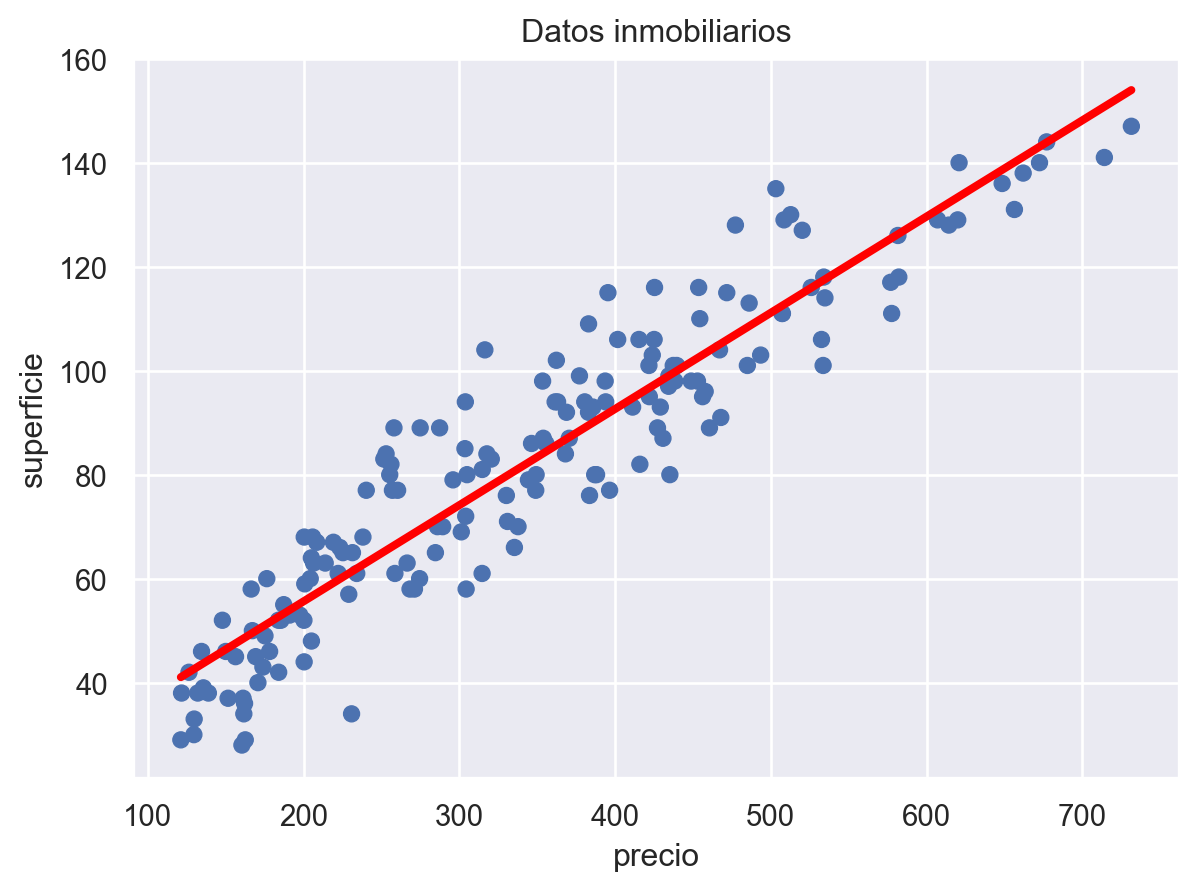

In [8]:
(
    so.Plot(data = datos, x= "precio", y= "superficie")
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1)) #, label='Regresión')
    .label(title='Datos inmobiliarios')
)

Calcular los coeficientes de la recta que mejor ajusta a los datos. Según el modelo, ¿qué
podríamos interpretar sobre el costo del metro cuadrado en la ciudad?

In [9]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo.fit(datos[["precio"]], datos[["superficie"]])   # Realizamos el ajuste
beta_1 = modelo.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
beta_0 = modelo.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)

beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)

# cómo interpreto los resultados?

Beta_1:  0.18501880522184389
Beta_0:  18.62503783800618


In [10]:
x = datos["precio"]
y = datos["superficie"]

def r_cuad(x, y, beta_1, beta_0):
    ys = beta_0 + beta_1*x
    ym = np.mean(y)
    b = np.mean((ys - ym)**2)
    c = np.mean((y - ym)**2)
    return b/c

print(r_cuad(x,y,beta_1, beta_0))

def ecm(x, y, beta_1, beta_0):
    ys = beta_0 + beta_1*x
    a = np.mean((y - ys)**2)
    return a

print(ecm(x,y,beta_1, beta_0))

0.8762114698357932
102.78555939937024


In [11]:
# para el R² primero van los datos observados (𝑦) y luego los datos predichos (𝑦̂)
y_pred = modelo.predict(datos[['precio']])
print(r2_score(y, y_pred))
print(mean_squared_error(datos[['superficie']], y_pred))

0.8762114698357936
102.78555939937024


<Axes: xlabel='precio', ylabel='zona'>

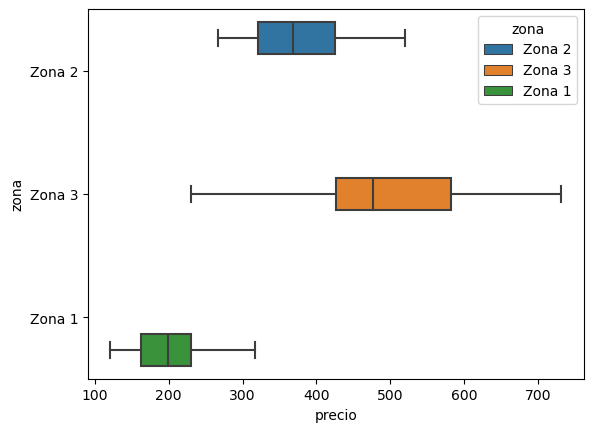

In [12]:
sns.boxplot(data = datos, x="precio", y = "zona", hue = "zona")

# hay mayor variabilidad de precios en la zona 3
# no hay outliers

Graficar los datos y el ajuste lineal de cada zona utilizando el método facet() de Plot()
(recordar ejercicio 5.b de la práctica 3) ¿Cuál es el valor del metro cuadrado en cada zona?
¿Qué podemos concluir si comparamos estos valores con lo obtenido en el ítem c)?

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

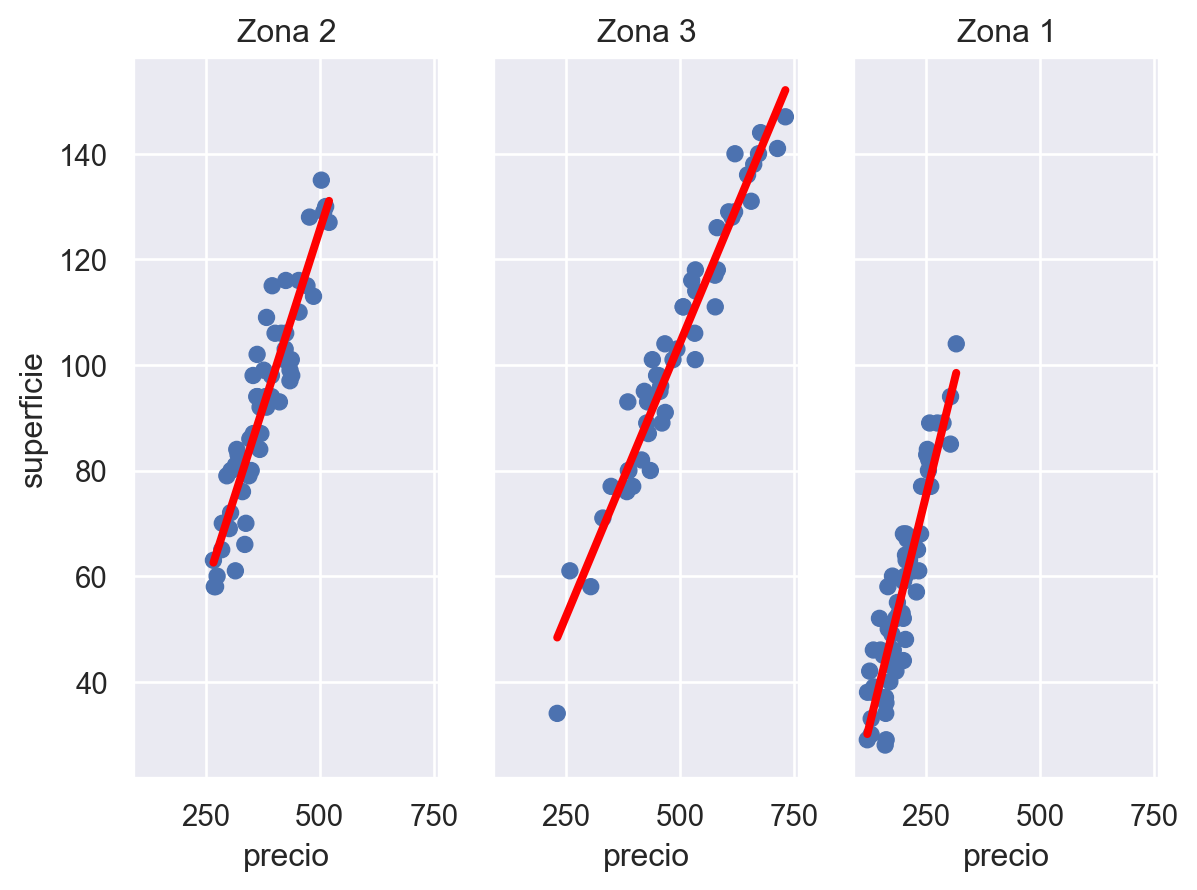

In [59]:
(
    so.Plot(data = datos, x = "precio", y = "superficie")
    .add(so.Dot())
    .facet("zona")
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1))
)

# ¿Cuál es el valor del metro cuadrado en cada zona?

In [60]:
datos

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3
...,...,...,...
164,116.0,525.953698,Zona 3
165,118.0,582.190837,Zona 3
166,52.0,200.256009,Zona 1
167,37.0,151.569142,Zona 1


Supongamos que queremos poner a la venta un inmueble de 105 m2. Sólo con esa
información y teniendo en cuenta los items anteriores, ¿cuál sería el precio de refencia
para la venta? Si sabemos además que el inmueble está en la Zona 2, ¿cambiaría en algo
el valor calculado anteriormente?

In [61]:
modelo = linear_model.LinearRegression()
modelo.fit(datos[["superficie"]], datos[["precio"]])
modelo.predict(pd.DataFrame({"superficie" : [105]})).item()

451.5271323108253

In [62]:
datosZona2 = datos[datos.zona == "Zona 2"]

In [63]:
modelo = linear_model.LinearRegression()
modelo.fit(datosZona2[["superficie"]], datosZona2[["precio"]])
modelo.predict(pd.DataFrame({"superficie" : [105]})).item()

417.3894041623672

(k) Si me ofrecen un inmueble de 100 m2
en la Zona 2 a un precio de 300, ¿qué tan barato o
caro es respecto a su precio de referencia?

In [66]:
modelo.predict(pd.DataFrame({"superficie": [100]})).item()
# no sé si es la idea resolverlo así.
# es barato respecto a su precio de referencia

401.3580091668062

(l) Efecto de los outliers. En este item trabajaremos con los datos de inmuebles_outliers.csv,
que tiene los mismos datos que inmuebles.csv, salvo cuatro que son outliers.
i. Realizar un boxplot que permita identificar en qué zona(s) se encuentran los outlierm h)

In [13]:
datos = pd.read_csv('inmuebles_outliers.csv')
datos.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


<Axes: xlabel='precio', ylabel='zona'>

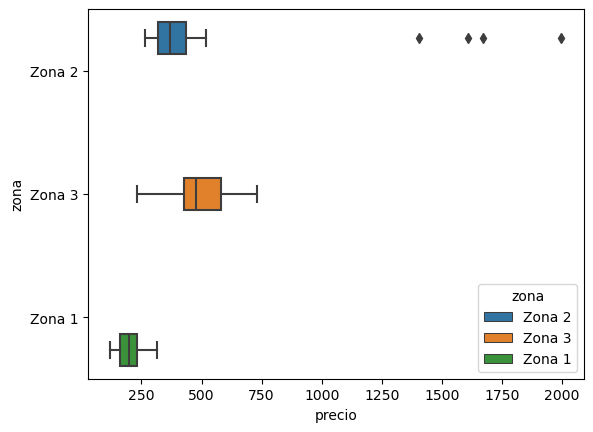

In [14]:
sns.boxplot(data = datos, x= "precio", y = "zona", hue = "zona")
# según el gráfico, podemos ver que los outliers se encuentran aparentemente en la zona 2

__ii. (CONSULTAR) Comparar los coeficientes del ajuste lineal de la(s) zona(s) afectada(s) con los obtenidos
en el ítem h)__

In [20]:
modeloOutliers = linear_model.LinearRegression()
modeloOutliers.fit(datos[["superficie"]], datos["precio"])
y = modeloOutliers.predict(datos[["superficie"]])
coeficientes = modeloOutliers.coef_ 
intercepto = modeloOutliers.intercept_
print(coeficientes, intercepto)

[5.27623716] -59.72328730121012


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


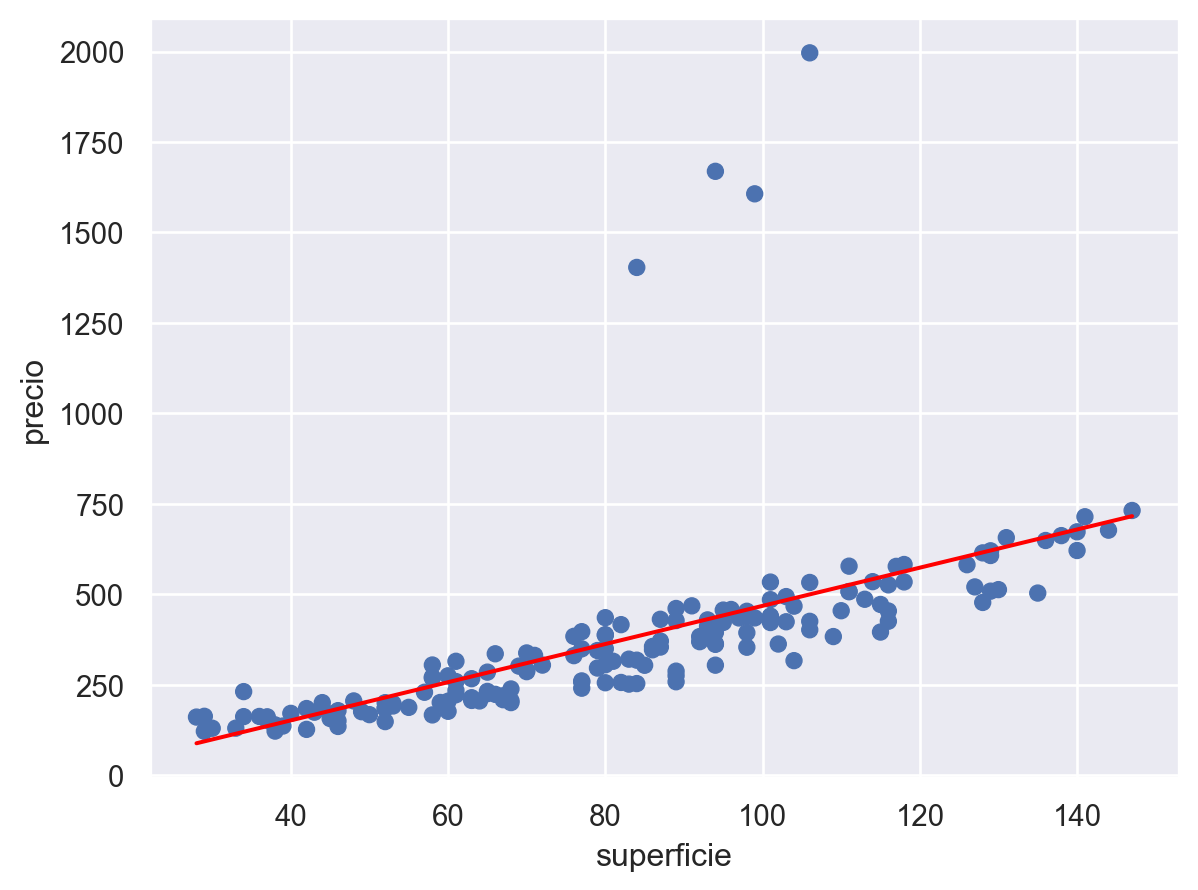

In [21]:
(
    so.Plot(datos, x="superficie", y="precio")
    .add(so.Dot())
    .add(so.Line(color = "red"), so.PolyFit(1))
)

In [22]:
btc = pd.read_csv('bitcoin.csv')
btc.head ()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [23]:
# Nos aseguramos que pandas interprete la fecha correctamente
btc['Date'] = pd. to_datetime (btc['Date'], format='%Y-%m-%d')

In [24]:
# Filtramos el dataset en el periodo de interes
btc_2021 = btc [( btc['Date']>"2021 -01 -01") & (btc['Date']<"2021 -07 -01")]

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


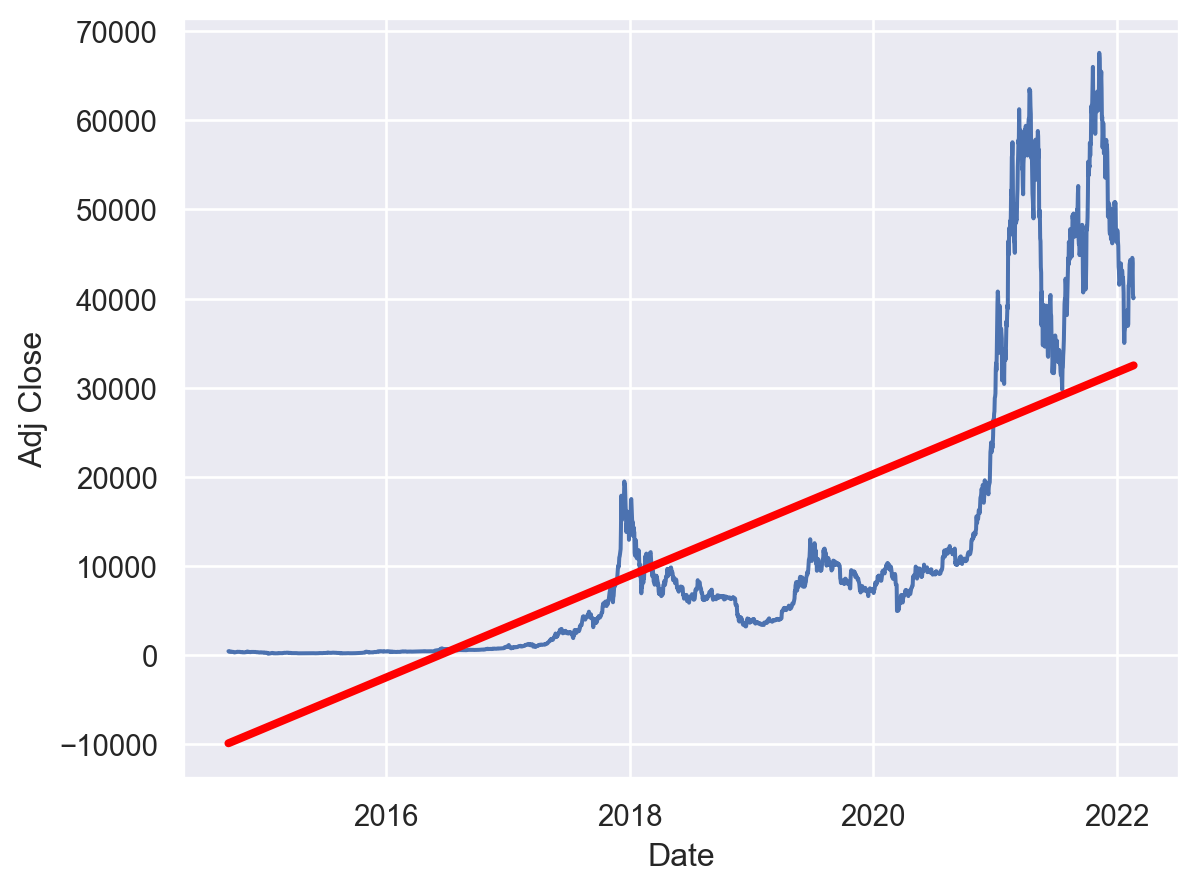

In [25]:
(
    so.Plot(data = btc, x = "Date", y = "Adj Close")
    .add(so.Line())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1))
)

# no sirve este ajuste

4. Utilizando el dataset tips de seaborn:
datos = sns. load_dataset ('tips')
realizar la Regresión Lineal donde la variable X es total_bill menos el promedio de total_bill
y la variable Y es tip. Responder las siguientes preguntas:

In [26]:
datos = sns. load_dataset ('tips')
datos.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
xprom = datos["total_bill"].mean()
x = datos["total_bill"] - xprom
X = x.array.reshape(-1, 1)

# hay alguna otra alternativa para esta parte de array.reshape(-1, 1)?? Cómo habría que resolverlo?

In [28]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo.fit(X, datos[["tip"]])   # Realizamos el ajuste
beta_1 = modelo.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
beta_0 = modelo.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)

beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)

Beta_1:  0.10502451738435337
Beta_0:  2.99827868852459


(a) ¿Qué interpretación se le puede dar a β0? Pista: calcular el promedio de las propinas.

In [29]:
yprom = datos["tip"].mean()
display(yprom)

2.99827868852459

Rta: Cuando X es cero, el valor predicho de Y (tip) es el intercepto. En este caso, el intercepto sería igual al promedio de las propinas. 
Por lo tanto, podemos interpretar β0 como el valor esperado de Y (tip) cuando X es cero, es decir, el valor esperado de las propinas cuando el monto total de la cuenta es igual al promedio de todos los montos totales de las cuentas

In [30]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo.fit(datos[["total_bill"]], datos[["tip"]])   # Realizamos el ajuste
beta_1 = modelo.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
beta_0 = modelo.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)

beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)

Beta_1:  0.10502451738435337
Beta_0:  0.9202696135546731


(b) ¿Cambia el valor de β1 respecto a la Regresión Lineal de total_bill vs. tip?
No, no cambia (por qué? jajaja)

En este ejercicio utilizaremos el dataset healthexp de seaborn, donde se recopila cada año
(Year) lo que cada país (Country) invierte en salud por habitante (Spending_USD) y su
expectativa de vida (Life_Expectancy).
Nos enfocaremos en los datos de Japón, nuestra variable predictora será Spending_USD y la
dependiente será Life_Expectancy.

In [31]:
datos = sns.load_dataset("healthexp")
datos.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


(a) Visualizar en un mismo gráfico los datos y los polinomios de grado 1, de grado 2 y de grado
3 que mejor ajustan a los datos. Añadir etiquetas que para facilitar la interpretación del
gráfico.

In [32]:
datosJapon = datos[datos["Country"] == "Japan"]
datosJapon

,Year,Country,Spending_USD,Life_Expectancy
3,1970,Japan,150.437,72.0
8,1971,Japan,163.854,72.9
11,1972,Japan,185.390,73.2
14,1973,Japan,205.778,73.4
17,1974,Japan,242.018,73.7
21,1975,Japan,284.269,74.3
25,1976,Japan,303.725,74.8
28,1977,Japan,340.628,75.3
31,1978,Japan,392.577,75.7
35,1979,Japan,452.931,76.2


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

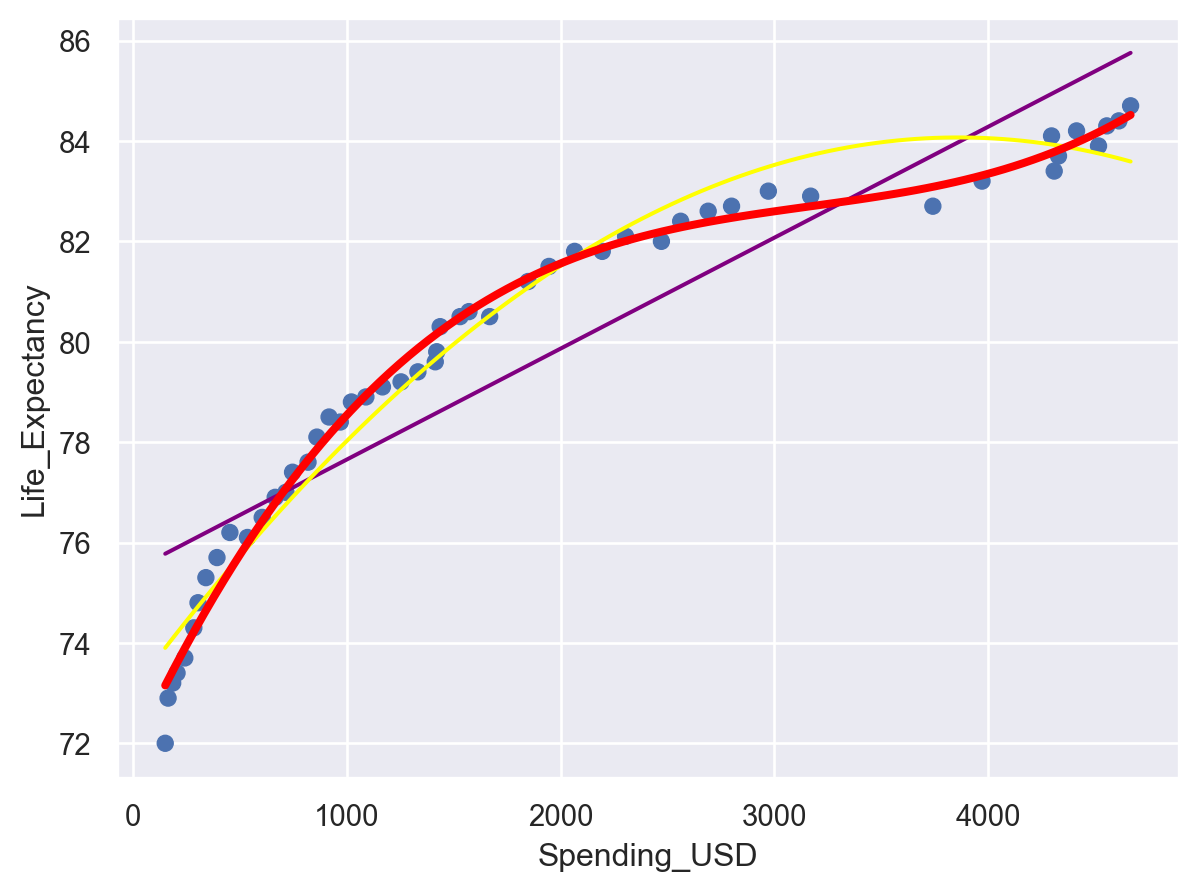

In [85]:
(
    so.Plot( data = datosJapon, x = "Spending_USD", y = "Life_Expectancy")
    .add(so.Dot())
    .add(so.Line(color = "purple"), so.PolyFit(1))
    .add(so.Line(color = "yellow"), so.PolyFit(2))
    .add(so.Line(color = "red", linewidth=3), so.PolyFit(3))
)

# no sé por qué no me deja agregar etiquetas

Resto de los items (b,c,d,e).

In [35]:
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios

In [61]:
print(datosJapon["Spending_USD"].values.reshape(-1,1).shape)
print(x_poly.shape)

(51, 1)
(51, 3)


In [78]:
# Indicamos que queremos un polinomio de Grado 3 sin ordenada al origen
polynomial_features= PolynomialFeatures(degree=3, include_bias=False)  # esto último es como un "por ahora olvidate del B0"

# Armamos una matriz cuya primera columna es x, la segunda es x^2 y la tercera es x^3
x_poly = polynomial_features.fit_transform(datosJapon[['Spending_USD']])   

In [79]:
y = datosJapon[["Life_Expectancy"]]

In [91]:
x_poly = pd.DataFrame(x_poly)

In [92]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo.fit(x_poly, y)   # Realizamos el ajuste
y_pred = modelo.predict(x_poly)
beta_1 = modelo.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
beta_0 = modelo.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)

beta_1 = modelo.coef_
beta_0 = modelo.intercept_.item()
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)

Beta_1:  [[ 9.09766222e-03 -2.68417332e-06  2.82168485e-10]]
Beta_0:  71.84403247809703


In [93]:
r2 = r2_score(y,y_pred)
ecm = mean_squared_error(y,y_pred)
print(r2, ecm)

0.9912790933475436 0.10758286138707254


In [108]:
# Crear las características polinómicas para el nuevo dato de entrada
nuevo_dato = pd.DataFrame({"Spending_USD": [5000]})
nuevo_dato_poly = polynomial_features.transform(nuevo_dato)

# Realizar la predicción
prediccion = modelo.predict(nuevo_dato_poly)

print("La esperanza de vida predicha para un gasto de USD$5000 es:", int(prediccion.item()), "años")

La esperanza de vida predicha para un gasto de USD$5000 es: 85 años


C:\Users\Usuario\anaconda3\Lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\Usuario\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_stats\regression.py:30: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, self.order)
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with 

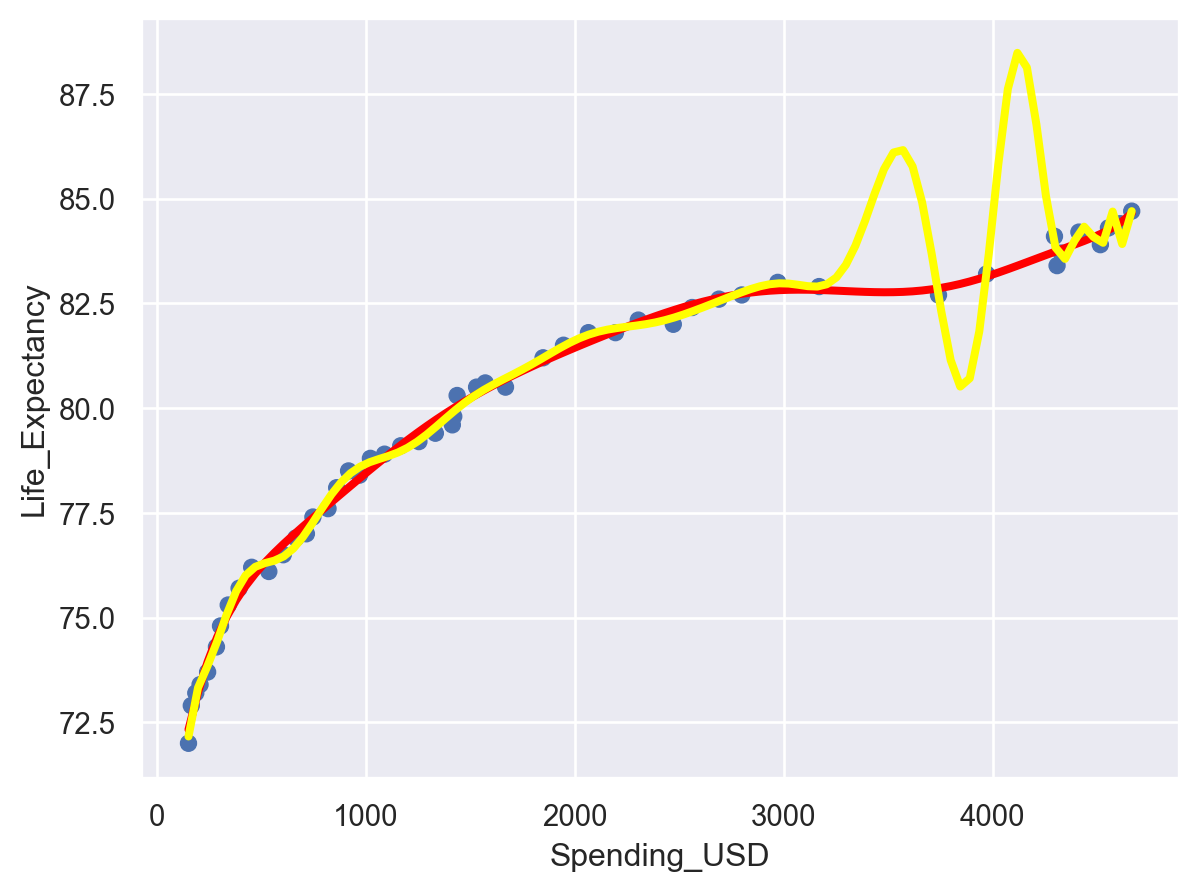

In [111]:
(
    so.Plot( data = datosJapon, x = "Spending_USD", y = "Life_Expectancy")
    .add(so.Dot())
    .add(so.Line(color = "red", linewidth=3), so.PolyFit(10))
    .add(so.Line(color = "yellow", linewidth=3), so.PolyFit(50))
)

No es conveniente ajustar con un polinomio de grado muy alto porque estaríamos sobreajustando los datos